## ECGR 4105 - HomeWork 0 - Problem # 1

The goal of this Problem # 1 is to develop a code to run Linear Regression with Gradient Descent Algorithm. Three different trainings will be performed with each of the 3 explanatory variables (X1, X2, & X3). 

In [234]:
# Importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [235]:
# Importing Data File (D3.csv) as df (DataFrame)
df = pd.read_csv("D3.csv")

In [236]:
# First 3 Columns are independent variables X1, X2, and X3. 4th Column is the dependent variable Y
df.head(10)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
5,0.202020,2.914747,2.682424,3.815420
6,0.242424,3.609697,3.130909,4.091200
7,0.282828,0.304646,3.579394,2.363715
8,0.323232,0.999596,0.027879,3.832965
9,0.363636,1.694545,0.476364,4.098950


In [237]:
len(df)

100

## Explanatory Variable X1 Calculations

In [238]:
# Getting 1st Explanatory Independent Variables X1
X1 = df.values[:,0]

# Getting Dependent Variable Y
Y = df.values[:,3]
len(X1), len(Y)

(100, 100)

In [239]:
# Showing only first 5 records for X1 and Y
print("X1 = ", X1[: 5])
print("Y = ", Y[: 5]) 

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
Y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


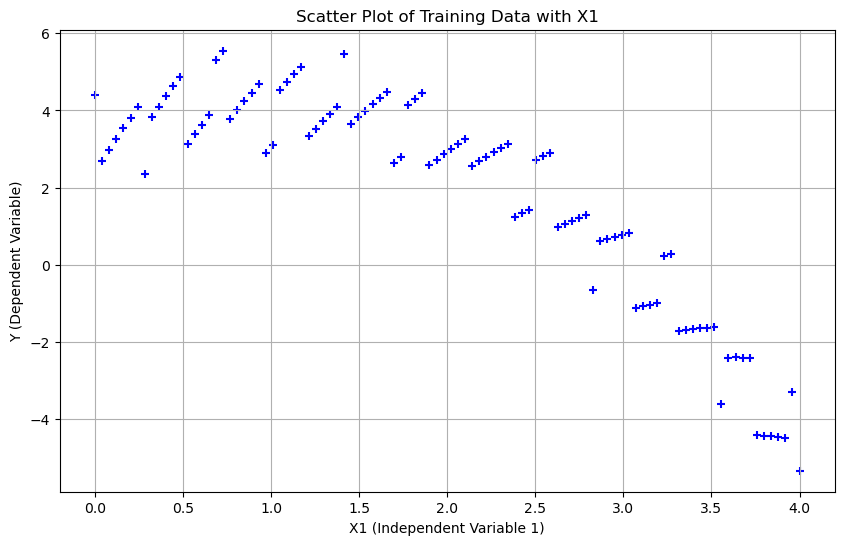

In [240]:
# Plotting the Data for X1 and Y
plt.scatter(X1,Y, color = 'blue', marker = '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel("X1 (Independent Variable 1)")
plt.ylabel("Y (Dependent Variable)")
plt.title("Scatter Plot of Training Data with X1");

In [241]:
# Conversion of X (1D Array) to 2D array using the reshape function
m = len(X1)
X_of_1 = X1.reshape(m,1)

print("X_of_1 = ", X_of_1[:10])

X_of_1 =  [[0.        ]
 [0.04040404]
 [0.08080808]
 [0.12121212]
 [0.16161616]
 [0.2020202 ]
 [0.24242424]
 [0.28282828]
 [0.32323232]
 [0.36363636]]


In [242]:
# Creation of a matrix with a single column of '1s'
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 100)

In [243]:
# Stack X_0 and X_1 horizontally using the hstack function
X1 = np.hstack((X_0, X_of_1))

print(X1[:5])

[[1.         0.        ]
 [1.         0.04040404]
 [1.         0.08080808]
 [1.         0.12121212]
 [1.         0.16161616]]


In [244]:
theta = np.zeros(2)
theta

array([0., 0.])

In [245]:
def compute_loss(X1,Y,theta):
    
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1/(2 * m) * np.sum(sqrErrors)
    
    return J

In [246]:
# Computation of the loss for theta values
loss = compute_loss(X1,Y,theta)


print("The loss for the given values of theta_0 and theta_1 = ", loss)

The loss for the given values of theta_0 and theta_1 =  5.524438459196242


In [247]:
def gradient_descent(X1,Y,theta,alpha,iterations):
   loss_history = np.zeros(iterations)

   for i in range(iterations):
        predictions = X1.dot(theta)
        errors = np.subtract(predictions,Y)
        sum_delta = (alpha / m) * X1.transpose().dot(errors);
        theta = theta - sum_delta;
        loss_history[i] = compute_loss(X1,Y,theta)
        
   return theta, loss_history

In [248]:
theta = [0., 0.]
iterations = 1000
alpha = 0.1

In [249]:
theta, loss_history = gradient_descent(X1,Y,theta, alpha, iterations)

print("Final value of theta = ", theta);
print("loss_history = ", loss_history);

Final value of theta =  [ 5.92794892 -2.03833663]
loss_history =  [5.16999006 4.96338989 4.7855721  4.61848888 4.45916697 4.30689303
 4.16130255 4.02209431 3.88898736 3.76171412 3.64001888 3.52365717
 3.41239525 3.30600959 3.2042865  3.10702162 3.01401956 2.9250935
 2.8400648  2.75876264 2.68102372 2.60669185 2.53561773 2.46765857
 2.40267785 2.34054503 2.28113532 2.22432934 2.170013   2.11807718
 2.06841755 2.02093435 1.9755322  1.93211988 1.89061019 1.85091975
 1.81296882 1.77668116 1.74198388 1.70880727 1.6770847  1.64675243
 1.61774953 1.59001774 1.56350135 1.53814709 1.51390403 1.49072347
 1.46855885 1.44736563 1.42710125 1.40772499 1.38919794 1.37148287
 1.3545442  1.33834789 1.32286143 1.30805369 1.29389492 1.28035669
 1.2674118  1.25503425 1.24319917 1.23188278 1.22106236 1.21071616
 1.2008234  1.19136421 1.1823196  1.17367137 1.16540218 1.1574954
 1.14993515 1.14270624 1.13579415 1.129185   1.1228655  1.11682297
 1.11104527 1.10552079 1.10023842 1.09518757 1.09035808 1.0857402

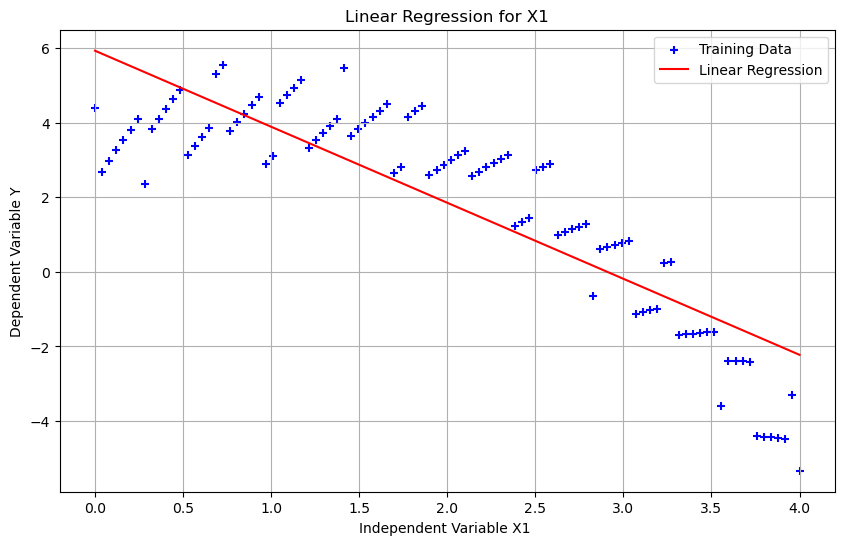

In [250]:
plt.scatter(X1[:,1], Y, color = "blue", marker = "+", label = "Training Data")
plt.plot(X1[:,1],X1.dot(theta), color = "red", label = "Linear Regression" )
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Independent Variable X1 ");
plt.ylabel("Dependent Variable Y");
plt.title("Linear Regression for X1");
plt.legend();

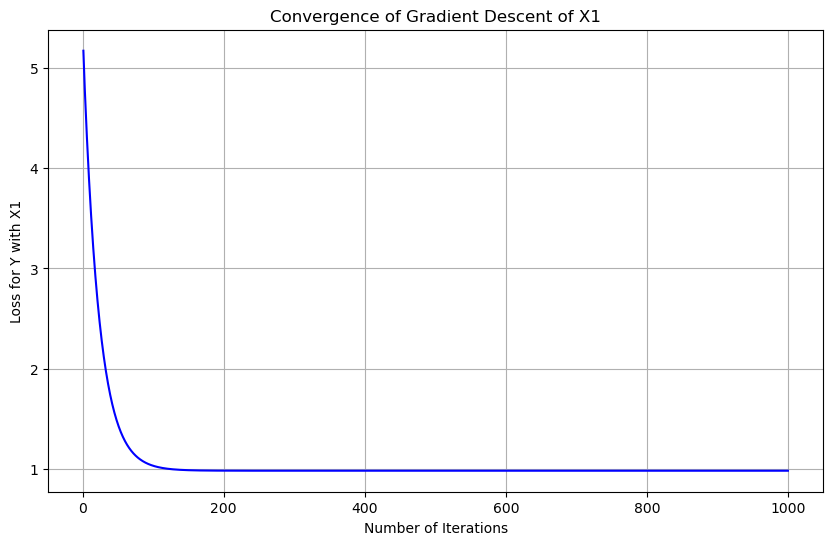

In [251]:
plt.plot(range(1, iterations + 1), loss_history, color = "blue")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations");
plt.ylabel("Loss for Y with X1");
plt.title("Convergence of Gradient Descent of X1");

## Explanatory Variable X2 Calculations

In [252]:
# Getting 1st Explanatory Independent Variables X2
X2 = df.values[:,1]

len(X2), len(Y)

(100, 100)

In [253]:
# Showing only first 5 records for X2 and Y
print("X2 = ", X2[: 5])
print("Y = ", Y[: 5]) 

X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
Y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


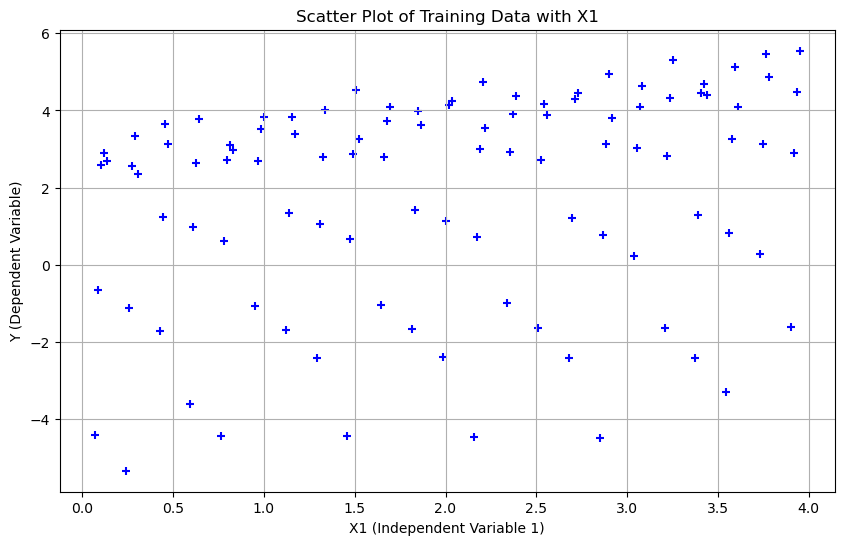

In [254]:
# Plotting the Data for X2 and Y
plt.scatter(X2,Y, color = 'blue', marker = '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel("X1 (Independent Variable 1)")
plt.ylabel("Y (Dependent Variable)")
plt.title("Scatter Plot of Training Data with X1");

In [255]:
# Conversion of X (1D Array) to 2D array using the reshape function
m = len(X2)
X_of_2 = X2.reshape(m,1)

print("X_of_2 = ", X_of_2[:10])

X_of_2 =  [[3.44      ]
 [0.1349495 ]
 [0.82989899]
 [1.52484848]
 [2.21979798]
 [2.91474747]
 [3.60969697]
 [0.30464646]
 [0.99959596]
 [1.69454546]]


In [256]:
# Stack X_0 and X_of_2 horizontally using the hstack function
X2 = np.hstack((X_0, X_of_2))

print(X2[:5])

[[1.         3.44      ]
 [1.         0.1349495 ]
 [1.         0.82989899]
 [1.         1.52484848]
 [1.         2.21979798]]


In [257]:
def compute_loss(X2,Y,theta):
    
    predictions = X2.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1/(2 * m) * np.sum(sqrErrors)
    
    return J

In [258]:
# Computation of the loss for theta values
loss = compute_loss(X2,Y,theta)


print("The loss for the given values of theta_0 and theta_1 = ", loss)

The loss for the given values of theta_0 and theta_1 =  8.182525824555775


In [259]:
def gradient_descent(X2,Y,theta,alpha,iterations):
   loss_history = np.zeros(iterations)

   for i in range(iterations):
        predictions = X2.dot(theta)
        errors = np.subtract(predictions,Y)
        sum_delta = (alpha / m) * X2.transpose().dot(errors);
        theta = theta - sum_delta;
        loss_history[i] = compute_loss(X2,Y,theta)
        
   return theta, loss_history

In [260]:
theta, loss_history = gradient_descent(X2,Y,theta, alpha, iterations)

print("Final value of theta = ", theta);
print("loss_history = ", loss_history);

Final value of theta =  [0.73606043 0.55760761]
loss_history =  [7.26987578 7.00288482 6.83790041 6.69361126 6.55765325 6.42795298
 6.3039815  6.18544976 6.07211371 5.96374478 5.86012518 5.76104674
 5.66631044 5.57572599 5.48911143 5.40629278 5.32710368 5.25138507
 5.17898484 5.10975758 5.04356422 4.98027181 4.91975321 4.86188685
 4.8065565  4.75365102 4.70306414 4.65469424 4.60844417 4.56422102
 4.52193596 4.48150406 4.4428441  4.40587843 4.37053278 4.33673617
 4.30442071 4.27352148 4.24397641 4.21572617 4.18871401 4.16288566
 4.13818924 4.11457515 4.09199596 4.07040631 4.04976283 4.03002406
 4.01115034 3.99310377 3.9758481  3.95934866 3.94357231 3.92848737
 3.91406353 3.90027182 3.88708453 3.87447518 3.86241844 3.85089009
 3.83986698 3.82932695 3.81924884 3.80961241 3.8003983  3.791588
 3.78316382 3.77510883 3.76740685 3.76004241 3.75300072 3.74626763
 3.73982962 3.73367376 3.72778769 3.72215957 3.71677811 3.71163249
 3.70671238 3.70200789 3.69750958 3.69320841 3.68909574 3.68516331


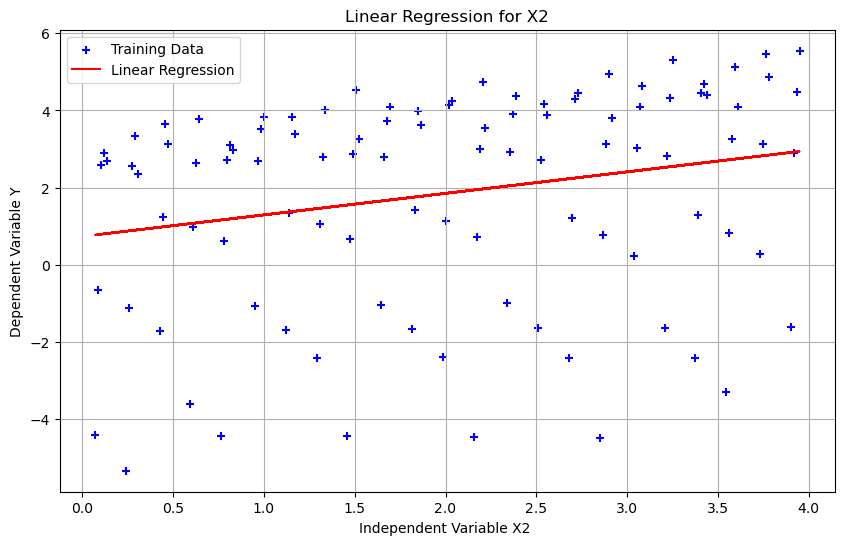

In [261]:
plt.scatter(X2[:,1], Y, color = "blue", marker = "+", label = "Training Data")
plt.plot(X2[:,1],X2.dot(theta), color = "red", label = "Linear Regression" )
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Independent Variable X2 ");
plt.ylabel("Dependent Variable Y");
plt.title("Linear Regression for X2");
plt.legend();

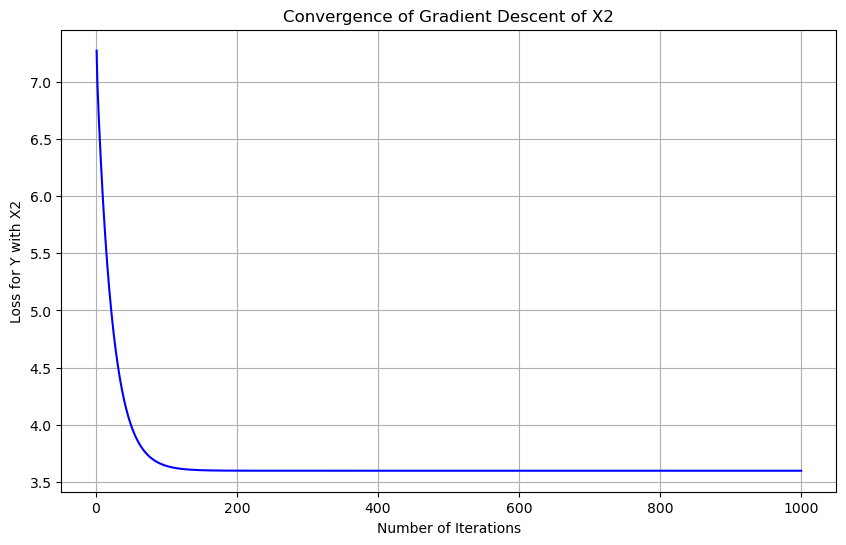

In [262]:
plt.plot(range(1, iterations + 1), loss_history, color = "blue")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations");
plt.ylabel("Loss for Y with X2");
plt.title("Convergence of Gradient Descent of X2");

## Explanatory Variable X3 Calculations

In [263]:
# Getting 1st Explanatory Independent Variables X3
X3 = df.values[:,2]

len(X3), len(Y)

(100, 100)

In [264]:
# Showing only first 5 records for X3 and Y
print("X3 = ", X3[: 5])
print("Y = ", Y[: 5]) 

X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
Y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


In [265]:
# Conversion of X (1D Array) to 2D array using the reshape function
m = len(X3)
X_of_3 = X3.reshape(m,1)

print("X_of_3 = ", X_of_3[:10])

X_of_3 =  [[0.44      ]
 [0.88848485]
 [1.3369697 ]
 [1.78545454]
 [2.23393939]
 [2.68242424]
 [3.13090909]
 [3.57939394]
 [0.02787879]
 [0.47636364]]


In [266]:
# Stack X_0 and X_of_2 horizontally using the hstack function
X3 = np.hstack((X_0, X_of_3))

print(X3[:5])

[[1.         0.44      ]
 [1.         0.88848485]
 [1.         1.3369697 ]
 [1.         1.78545454]
 [1.         2.23393939]]


In [267]:
def compute_loss(X3,Y,theta):
    
    predictions = X3.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1/(2 * m) * np.sum(sqrErrors)
    
    return J

In [268]:
# Computation of the loss for theta values
loss = compute_loss(X3,Y,theta)


print("The loss for the given values of theta_0 and theta_1 = ", loss)

The loss for the given values of theta_0 and theta_1 =  4.407877430792258


In [269]:
def gradient_descent(X3,Y,theta,alpha,iterations):
   loss_history = np.zeros(iterations)

   for i in range(iterations):
        predictions = X3.dot(theta)
        errors = np.subtract(predictions,Y)
        sum_delta = (alpha / m) * X3.transpose().dot(errors);
        theta = theta - sum_delta;
        loss_history[i] = compute_loss(X3,Y,theta)
        
   return theta, loss_history

In [270]:
theta, loss_history = gradient_descent(X3,Y,theta, alpha, iterations)

print("Final value of theta = ", theta);
print("loss_history = ", loss_history);

Final value of theta =  [ 2.8714221  -0.52048288]
loss_history =  [4.26200819 4.21568729 4.18664662 4.16138653 4.13765668 4.11504847
 4.09345632 4.07282596 4.05311313 4.0342768  4.01627795 3.99907934
 3.9826454  3.96694212 3.95193702 3.93759906 3.92389858 3.91080723
 3.89829793 3.8863448  3.87492312 3.86400925 3.85358062 3.84361566
 3.83409375 3.82499519 3.81630115 3.80799366 3.80005553 3.79247033
 3.78522238 3.77829667 3.77167889 3.76535534 3.75931294 3.75353919
 3.74802214 3.74275039 3.73771302 3.73289961 3.72830022 3.72390531
 3.71970581 3.71569302 3.71185864 3.70819474 3.70469374 3.7013484
 3.6981518  3.69509731 3.69217864 3.68938972 3.68672481 3.68417838
 3.68174517 3.67942013 3.67719848 3.67507559 3.6730471  3.67110879
 3.66925666 3.66748687 3.66579578 3.66417987 3.6626358  3.66116038
 3.65975057 3.65840343 3.65711619 3.65588618 3.65471086 3.65358779
 3.65251466 3.65148924 3.65050941 3.64957314 3.6486785  3.64782364
 3.64700678 3.64622624 3.64548041 3.64476774 3.64408675 3.643436

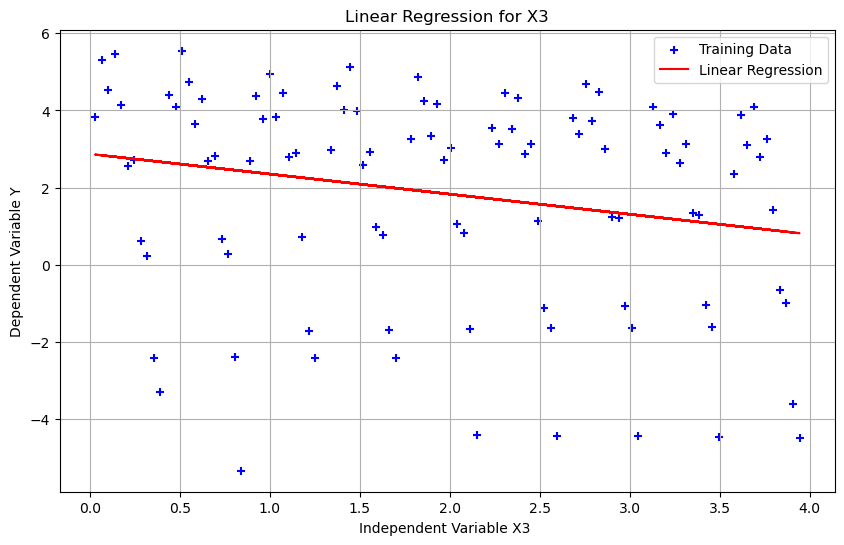

In [271]:
plt.scatter(X3[:,1], Y, color = "blue", marker = "+", label = "Training Data")
plt.plot(X3[:,1],X3.dot(theta), color = "red", label = "Linear Regression" )
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Independent Variable X3 ");
plt.ylabel("Dependent Variable Y");
plt.title("Linear Regression for X3");
plt.legend();

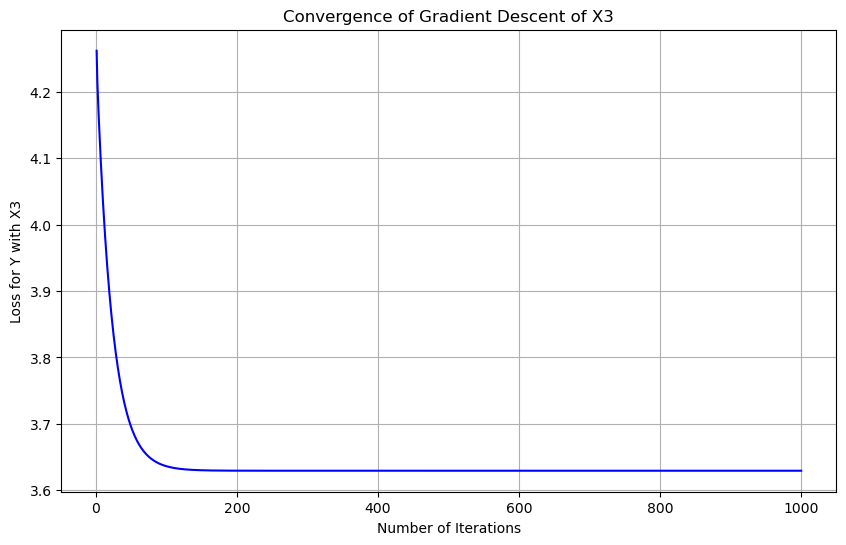

In [272]:
plt.plot(range(1, iterations + 1), loss_history, color = "blue")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations");
plt.ylabel("Loss for Y with X3");
plt.title("Convergence of Gradient Descent of X3");